<a href="https://colab.research.google.com/github/akhunzakp/PCVK_2025/blob/main/Week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

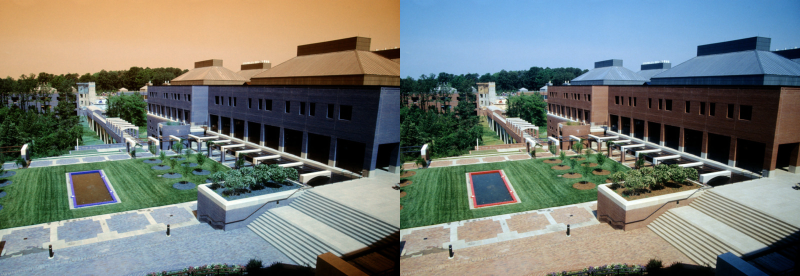

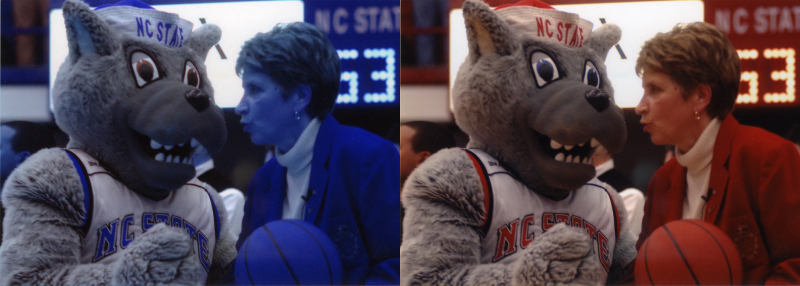

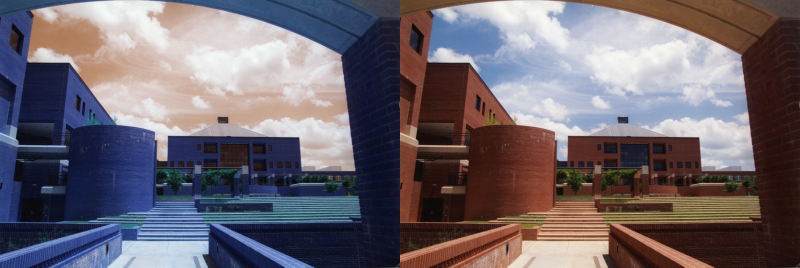



resolusi image: tinggi x lebar =  268  x  400


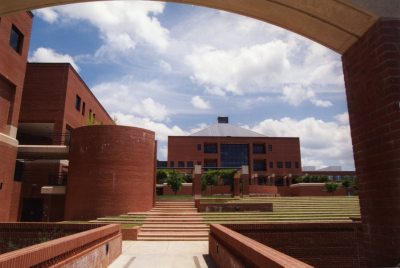

Garis Horizontal


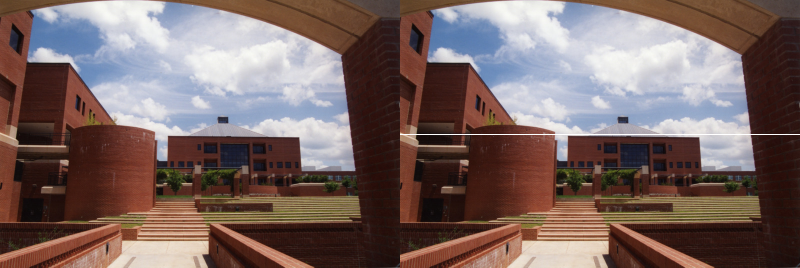

Garis Vertical


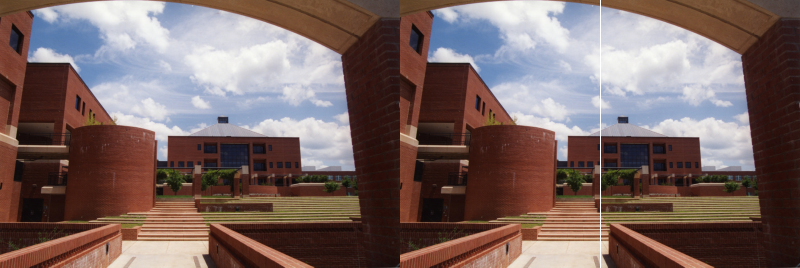

Garis Diagonal Silang Ujung ke Ujung


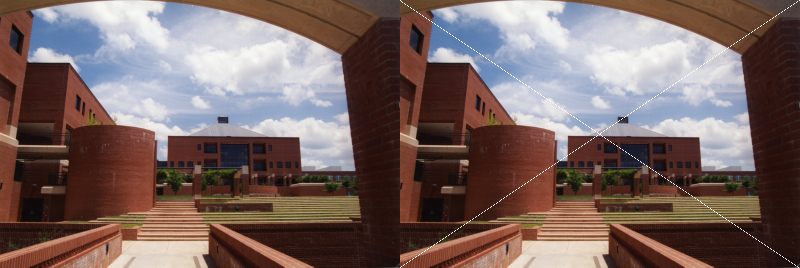

Garis Horizontal ditengah


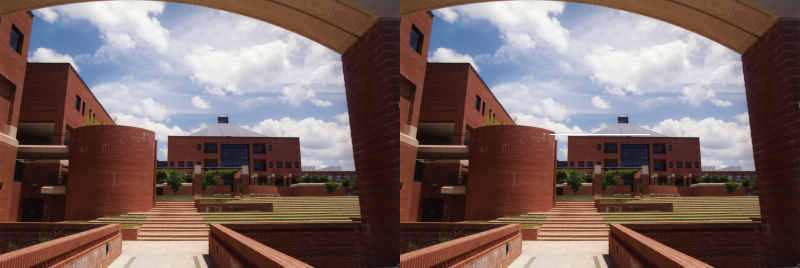

Gambar Kotak


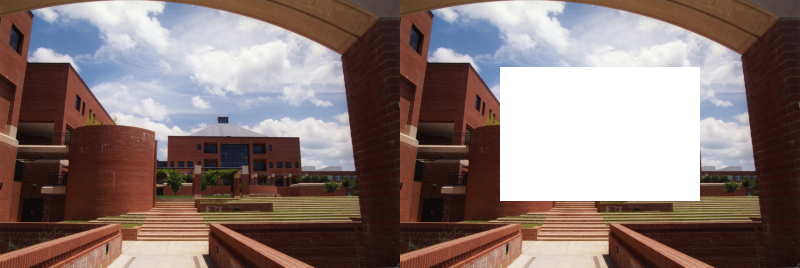

In [44]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from skimage import transform
from PIL import Image
import matplotlib.pylab as plt

#-- Membuat list untuk menyimpan url dari beberapa image #
urls = ["https://iiif.lib.ncsu.edu/iiif/0052574/full/800,/0/default.jpg",
        "https://iiif.lib.ncsu.edu/iiif/0016007/full/800,/0/default.jpg",
        "https://iiif.lib.ncsu.edu/iiif/0051230/full/800,/0/default.jpg"]
# baca dan tampilkan image
# loop pada tiap url image, beberapa image dapat disimpan list
for url in urls:
  image = io.imread(url)
  image = cv.resize(image, (0,0), fx=0.5, fy=0.5) # resize image to half size
  image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)  # convert color to RGB
  final_frame = cv.hconcat((image, image_2))      # concatenate image
  cv2_imshow(final_frame)                         # show image
  print('\n')

tinggi = image_2.shape[0]
lebar = image_2.shape[1]
print("resolusi image: tinggi x lebar = ", tinggi," x ", lebar)
cv2_imshow(image_2)


#-- Membuat garis Horizontal ditengah image #
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_3 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

tinggi, lebar, _ = image.shape

for y in range(lebar):
  image_3[int((tinggi)/2),y] = [255,255,255]

final_frame = cv.hconcat((image_2, image_3))
print("Garis Horizontal")
cv2_imshow(final_frame)



# E. Task
# 1. Do the practical steps as above
# 2. Create vertical lines and diagonal lines in the output image
#-- Vertical Lines #
image_4 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

for x in range(tinggi):
  image_4[x, int(lebar/2)] = [255,255,255]  # garis vertikal putih

final_frame2 = cv.hconcat((image_2, image_4))
print("Garis Vertical")
cv2_imshow(final_frame2)

#-- Diagonal Lines #
image_5 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

tinggi, lebar, _ = image.shape

# Diagonal (top-left to bottom-right)
for y in range(tinggi):
    x = int((lebar / tinggi) * y)
    if x < lebar:
        image_5[y, x] = [255, 255, 255]

# Diagonal  (top-right to bottom-left)
for y in range(tinggi):
    x = int(lebar - 1 - (lebar / tinggi) * y)
    if 0 <= x < lebar:
        image_5[y, x] = [255, 255, 255]

final_frame3 = cv.hconcat((image_2, image_5))
print("Garis Diagonal")
cv2_imshow(final_frame3)


#-- Create a horizontal line in the middle with certain length #
image_6 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

tinggi, lebar, _ = image.shape

# Vertical center
y_center = tinggi // 2

# Line length
line_length = lebar // 4

# posisi
x_start = (lebar - line_length) // 2
x_end   = x_start + line_length

# Horizontal white line
for x in range(x_start, x_end):
    image_6[y_center, x] = [255, 255, 255]

final_frame4 = cv.hconcat((image_2, image_6))
print("Garis Horizontal ditengah")
cv2_imshow(final_frame4)


#-- Create a filled box
image_8 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

tinggi, lebar, _ = image.shape

# Define the coordinates of the box area
x1, y1 = lebar//4, tinggi//4
x2, y2 = 3*lebar//4, 3*tinggi//4

# White filled box
for y in range(y1, y2):
    for x in range(x1, x2):
        image_8[y, x] = [255, 255, 255]

final_frame6 = cv.hconcat((image_2, image_8))
print("Gambar Kotak")
cv2_imshow(final_frame6)

